In [27]:
import matplotlib.pyplot as plt
import numpy as np

### Set up path to load in

In [28]:
dir_path="./results/discrete/"
path_exp = "discrete"
path_ctrl = "discrete_no_entropy"
save_fig = "discrete_no_entropy.jpg"
worker_num = 1
SUFFIX = ".txt"
FIG_PATH = "./report/images/continuous/"
SMOOTH_FACTOR = 4  # smooth the curve

### Reward load

In [29]:
exp_reward = []
ctrl_reward = []

def read_reward(dir_path, path, reward_avg, worknum=None):
    if worknum == None:
        reward_avg = read_reward_discrete(dir_path, path, reward_avg)
        return reward_avg
    for i in range(1, worknum+1):        
        path_read = dir_path + path + str(i) + SUFFIX    
        f = open(path_read, "r")
        rewards = list((f.read().split(" ")))
        rewards = rewards[:-1]
        rewards = [float(i) for i in rewards]
        if reward_avg == []:
            reward_avg = rewards
        else:
            reward_avg = [ (a+b) for (a, b) in zip(reward_avg, rewards)]        
    reward_avg = [i/worknum for i in reward_avg]    
    return reward_avg

def read_reward_discrete(dir_path, path, reward_avg):
    path_read = dir_path + path + SUFFIX    
    f = open(path_read, "r")
    rewards = list((f.read().split(" ")))
    rewards = rewards[:-1]
    rewards = [float(i) for i in rewards]
    reward_avg = rewards    
    return reward_avg


exp_reward = read_reward(dir_path, path_exp, exp_reward, worker_num)
ctrl_reward = read_reward(dir_path, path_ctrl, ctrl_reward, worker_num)

FileNotFoundError: [Errno 2] No such file or directory: './results/continue/continue_truncation_para=15_4_1.txt'

In [ ]:
def smooth(episode, reward, smooth_factor):
    splitted_episode = []
    smoothed_reward = []
    smoothed_reward_len = len(episode) // smooth_factor if len(episode) % smooth_factor == 0 else len(episode) // smooth_factor + 1;
    for i in range(smoothed_reward_len):
        current_episode = i * smooth_factor
        splitted_episode.append(episode[current_episode])
        if i == smoothed_reward_len - 1:
            smoothed_reward.append(sum(reward[current_episode:]) / len(reward[current_episode:]))
        else:
            smoothed_reward.append(sum(reward[current_episode:current_episode+smooth_factor]) / smooth_factor)
    return splitted_episode, smoothed_reward

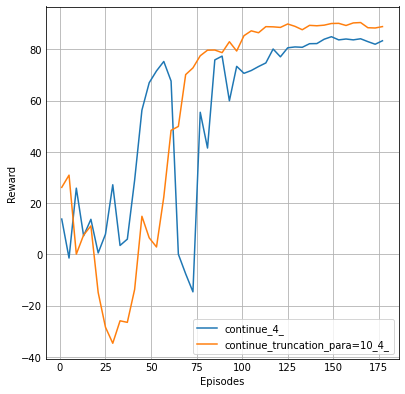

In [ ]:
plt.style.use('_mpl-gallery')

# make data
if len(exp_reward) != len(ctrl_reward):
       print("Warning: exp_reward and ctrl_reward have different length, truncating...")
       length = min(len(exp_reward), len(ctrl_reward))
       exp_reward = exp_reward[:length]
       ctrl_reward = ctrl_reward[:length]
episodes = len(exp_reward)
x = np.linspace(1, episodes, episodes)
exp_x, ctrl_x = x, x

# smooth if needed
exp_x, exp_reward = smooth(x, exp_reward, SMOOTH_FACTOR)
ctrl_x, ctrl_reward = smooth(x, ctrl_reward, SMOOTH_FACTOR)

# plot
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.set_xlabel('Episodes')
ax.set_ylabel('Reward')
ax.plot(exp_x, exp_reward, label=path_exp)
ax.plot(ctrl_x, ctrl_reward, label=path_ctrl)
ax.legend()

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()
fig.savefig(FIG_PATH + save_fig)